In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


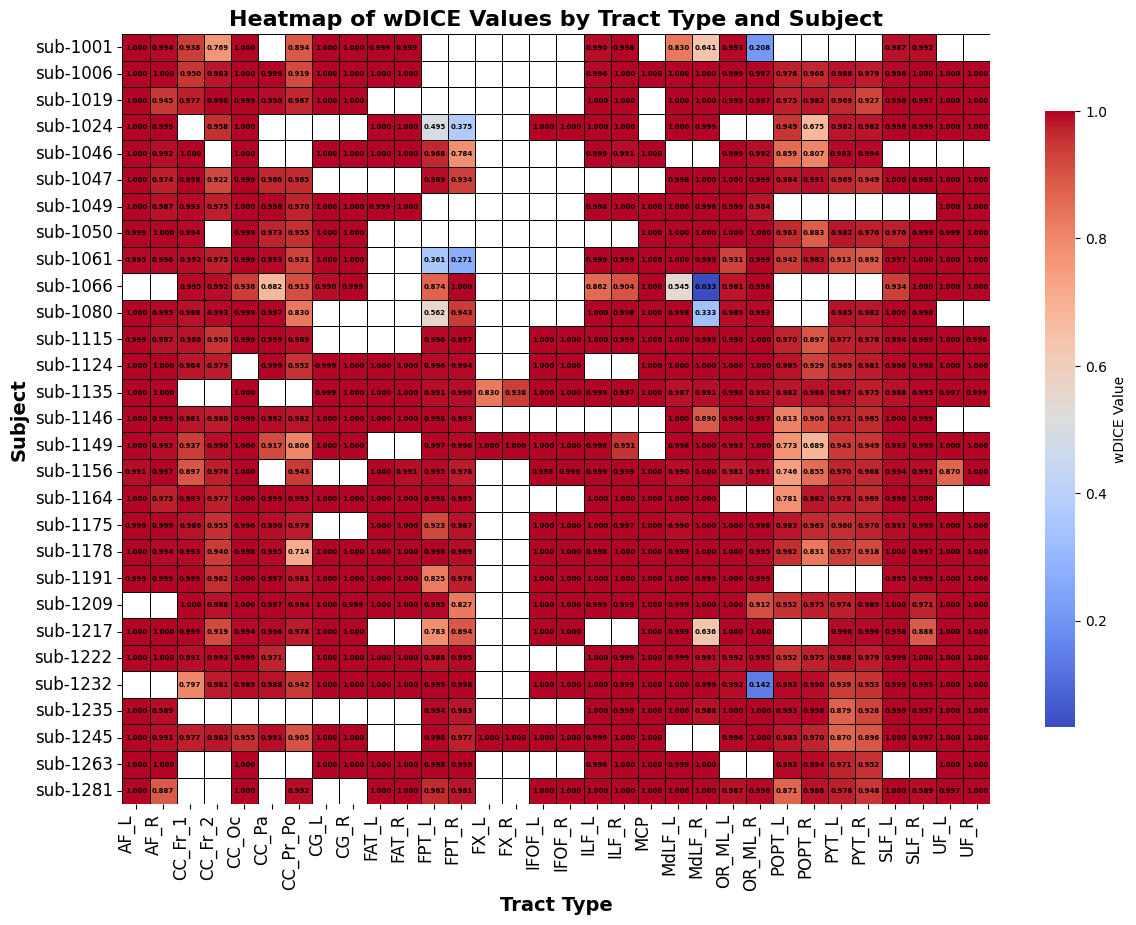

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = '/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv'#'/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv'  # Ajusta la ruta según sea necesario
df = pd.read_csv(file_path)


# Pivot the data for the heatmap
try:
    heatmap_data = df.pivot(index="subject_id", columns="tract", values="wDICE")
except Exception as e:
    raise ValueError(f"Error al hacer pivot de los datos: {e}")
# Improve the aesthetics of the heatmap for better presentation
plt.figure(figsize=(14, 10))

# Define a custom colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap with improved aesthetics
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    cmap=cmap,
    cbar=True,
    linewidths=0.5,
    linecolor='black',
    cbar_kws={"shrink": 0.8, "label": "wDICE Value"},
    annot_kws={"size": 5, "weight": "bold", "color": "black"},
)

# Set labels and title with improved fonts and styles
plt.xlabel("Tract Type", fontsize=14, fontweight='bold')
plt.ylabel("Subject", fontsize=14, fontweight='bold')
plt.title("Heatmap of wDICE Values by Tract Type and Subject", fontsize=16, fontweight='bold')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better separation of the cells
# plt.grid(visible=True, color='gray', linestyle='-', linewidth=0.7)

# Show the improved plot
plt.show()


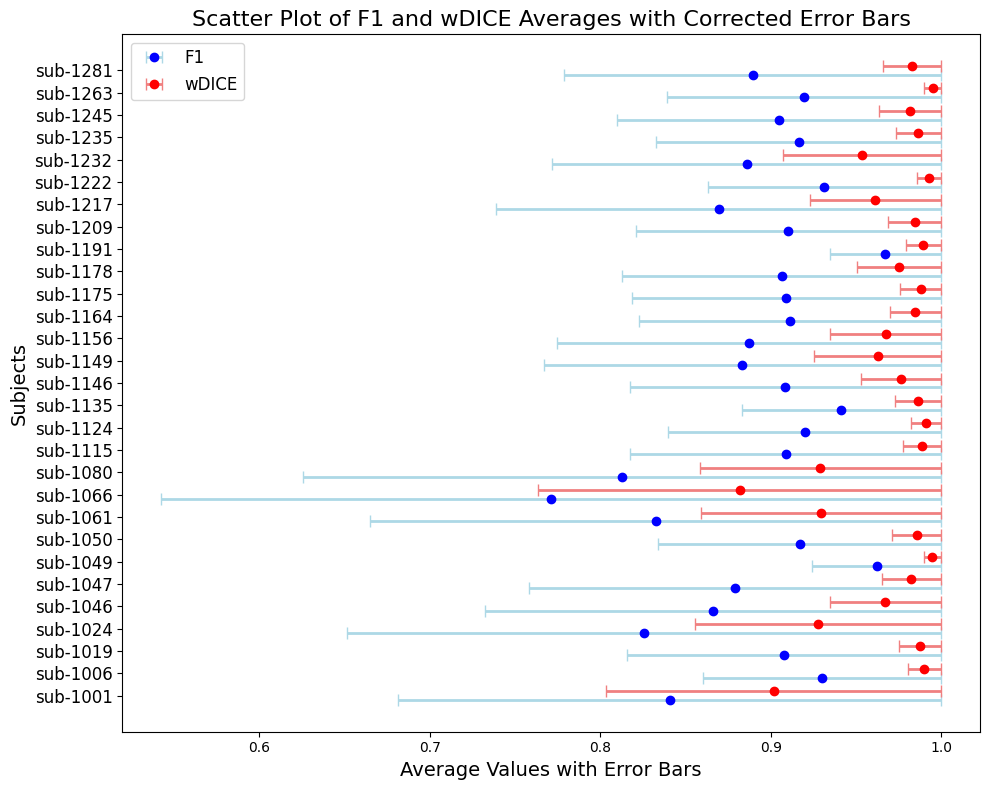

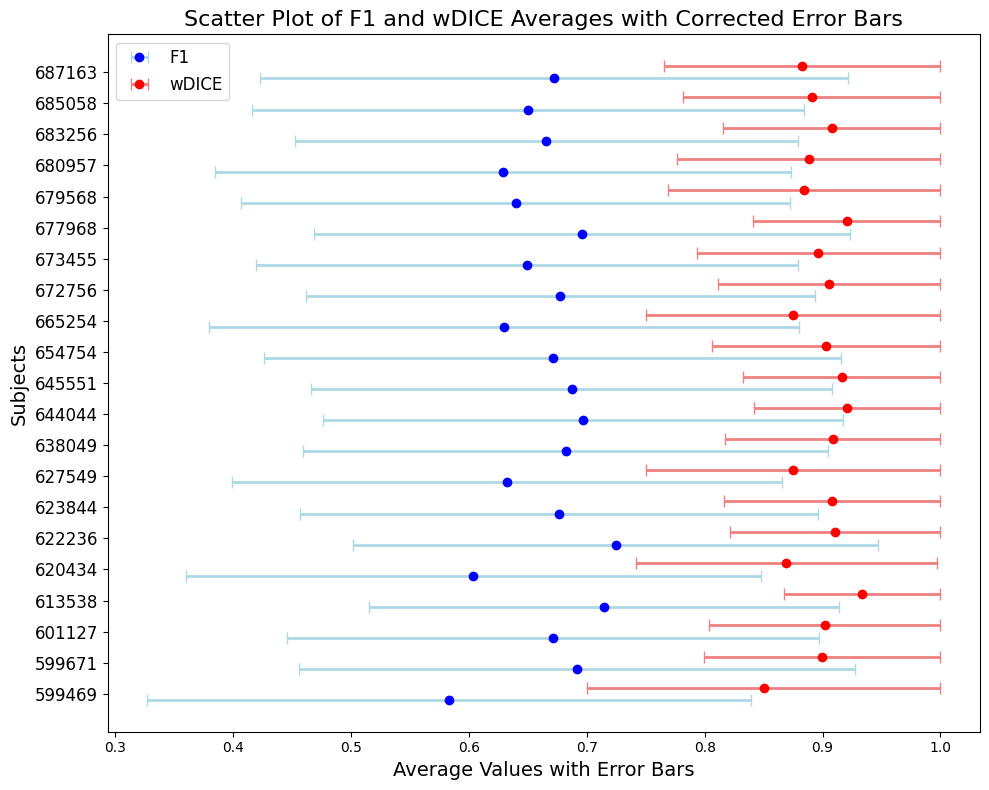

In [2]:
import matplotlib.pyplot as plt

def plot_f1_wdice_with_error_bars(df):
    # Calcular los promedios y desviaciones estándar de F1 y wDICE por sujeto
    subject_means = df.groupby('subject_id').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
    subject_means.columns = ['subject_id', 'F1_mean', 'F1_std', 'wDICE_mean', 'wDICE_std']

    # Limitar las barras de error para que no excedan el valor de 1
    subject_means['F1_upper'] = subject_means['F1_mean'] + subject_means['F1_std']
    subject_means['F1_upper'] = subject_means['F1_upper'].apply(lambda x: min(x, 1))
    subject_means['F1_std_corrected'] = subject_means['F1_upper'] - subject_means['F1_mean']

    subject_means['wDICE_upper'] = subject_means['wDICE_mean'] + subject_means['wDICE_std']
    subject_means['wDICE_upper'] = subject_means['wDICE_upper'].apply(lambda x: min(x, 1))
    subject_means['wDICE_std_corrected'] = subject_means['wDICE_upper'] - subject_means['wDICE_mean']

    # Crear el scatter plot con las barras de error corregidas
    fig, ax = plt.subplots(figsize=(10, 8))

    # Posicionar los puntos para que no se superpongan
    y_positions = range(len(subject_means['subject_id']))
    offset = 0.2  # Desplazamiento entre los puntos
    y_positions_f1 = [y - offset for y in y_positions]
    y_positions_wdice = [y + offset for y in y_positions]

    # Scatter plot con barras de error colocadas al lado
    ax.errorbar(subject_means['F1_mean'], y_positions_f1, xerr=subject_means['F1_std_corrected'], fmt='o', label='F1', color='blue', ecolor='lightblue', elinewidth=2, capsize=4)
    ax.errorbar(subject_means['wDICE_mean'], y_positions_wdice, xerr=subject_means['wDICE_std_corrected'], fmt='o', label='wDICE', color='red', ecolor='lightcoral', elinewidth=2, capsize=4)

    # Etiquetas y diseño
    ax.set_yticks(y_positions)
    ax.set_yticklabels(subject_means['subject_id'], fontsize=12)
    ax.set_xlabel('Average Values with Error Bars', fontsize=14)
    ax.set_ylabel('Subjects', fontsize=14)
    ax.set_title('Scatter Plot of F1 and wDICE Averages with Corrected Error Bars', fontsize=16)
    ax.legend(fontsize=12)

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
df = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')
plot_f1_wdice_with_error_bars(df)

df = pd.read_csv('/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv')
plot_f1_wdice_with_error_bars(df)


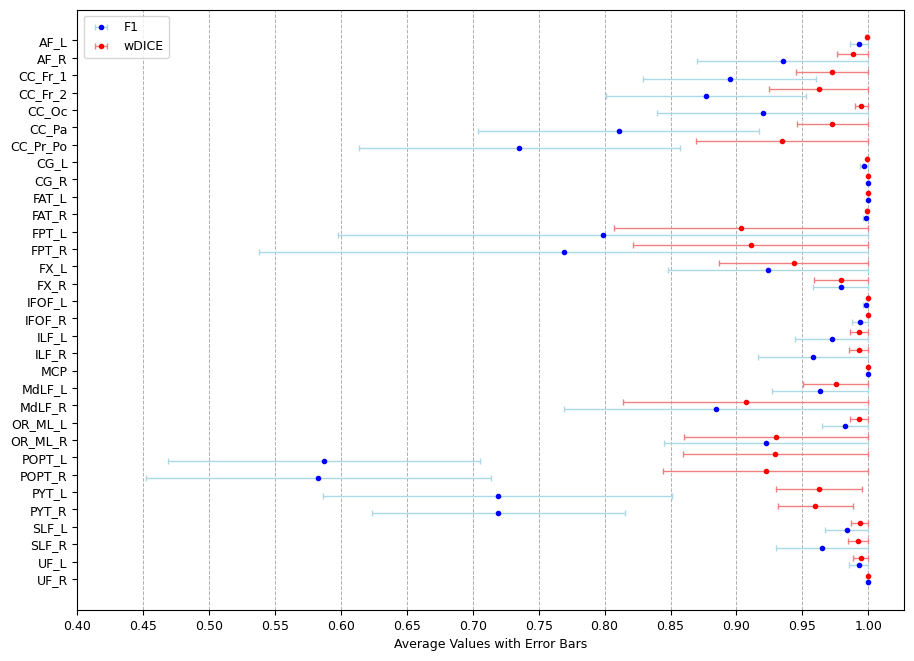

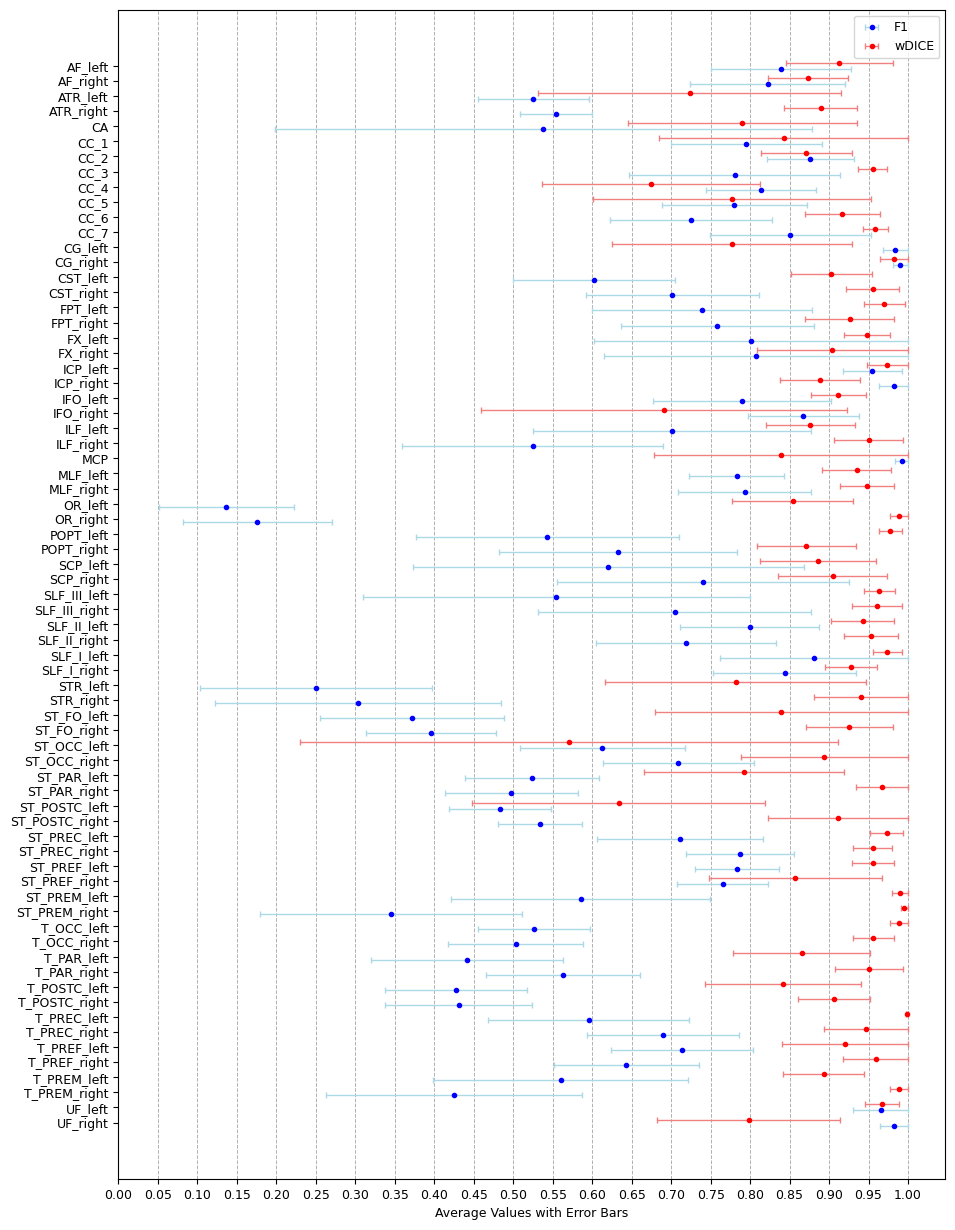

In [3]:
import numpy as np
def plot_f1_wdice_with_error_bars_by_tract(df, fontsize=12, figsize=(10, 8), low_limit=0.4, high_limit=1.05, save_path=None):
    # Ordenar el DataFrame por el nombre de los tractos
    df = df.sort_values('tract')
    
    # Calcular los promedios y desviaciones estándar de F1 y wDICE por tracto
    tract_means = df.groupby('tract').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
    tract_means.columns = ['tract', 'F1_mean', 'F1_std', 'wDICE_mean', 'wDICE_std']

    # Limitar las barras de error para que no excedan el valor de 1
    tract_means['F1_upper'] = tract_means['F1_mean'] + tract_means['F1_std']
    tract_means['F1_upper'] = tract_means['F1_upper'].apply(lambda x: min(x, 1))
    tract_means['F1_std_corrected'] = tract_means['F1_upper'] - tract_means['F1_mean']

    tract_means['wDICE_upper'] = tract_means['wDICE_mean'] + tract_means['wDICE_std']
    tract_means['wDICE_upper'] = tract_means['wDICE_upper'].apply(lambda x: min(x, 1))
    tract_means['wDICE_std_corrected'] = tract_means['wDICE_upper'] - tract_means['wDICE_mean']

    # Crear el scatter plot con las barras de error corregidas
    fig, ax = plt.subplots(figsize=figsize)

    # Posicionar los puntos para que no se superpongan
    # Posicionar los puntos para que no se superpongan
    y_positions = list(range(len(tract_means['tract'])))
    y_positions.reverse()  # Invertir el orden de las posiciones en el eje Y
    offset = 0.2  # Desplazamiento entre los puntos
    y_positions_f1 = [y - offset for y in y_positions]
    y_positions_wdice = [y + offset for y in y_positions]

    # Scatter plot con barras de error colocadas al lado
    ax.errorbar(tract_means['F1_mean'], y_positions_f1, xerr=tract_means['F1_std_corrected'], fmt='o', label='F1', color='blue', ecolor='lightblue', elinewidth=1, capsize=2, markersize=3)
    ax.errorbar(tract_means['wDICE_mean'], y_positions_wdice, xerr=tract_means['wDICE_std_corrected'], fmt='o', label='wDICE', color='red', ecolor='lightcoral', elinewidth=1, capsize=2, markersize=3)

    # Etiquetas y diseño
    ax.set_yticks(y_positions)
    ax.set_yticklabels(tract_means['tract'], fontsize=fontsize)
    ax.set_xlabel('Average Values with Error Bars', fontsize=fontsize)
    # ax.set_ylabel('Tracts', fontsize=fontsize)
    # ax.set_title('Scatter Plot of F1 and wDICE Averages by Tract with Corrected Error Bars', fontsize=fontsize)
    ax.legend(fontsize=fontsize)

     # Ajustar las líneas verticales (ticks) en el eje X a intervalos de 0.05
    ax.set_xticks(np.arange(low_limit, high_limit, 0.05))
    ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

    # Reducir el tamaño de los números del eje X
    ax.tick_params(axis='x', labelsize=fontsize)

    # Ajustar los márgenes usando subplots_adjust
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Guardar la figura en un archivo
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    
    
    plt.show()

# Ejemplo de uso
df = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')
plot_f1_wdice_with_error_bars_by_tract(df, fontsize=9, figsize=(8.27, 6), low_limit=0.4, high_limit=1.05, save_path='/app/imgs/results_tractoinferno_by_tract.pdf')

df = pd.read_csv('/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv')
plot_f1_wdice_with_error_bars_by_tract(df, fontsize=9, figsize=(8.27, 11.69), low_limit=0., high_limit=1.05, save_path='/app/imgs/results_hcp_105_without_cc_by_tract.pdf')


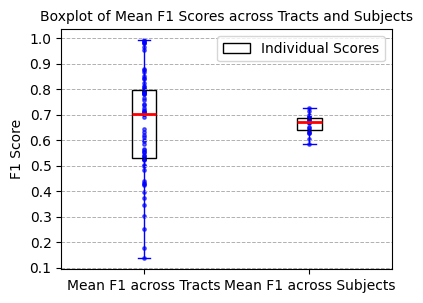

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_boxplot_f1_across_tracts_and_subjects(df, fontsize=12, figsize=(4.135, 3), markersize=6):
    # Calcular las medias de F1 para cada tracto
    f1_across_tracts = df.groupby('tract')['F1'].mean()

    # Calcular las medias de F1 para cada sujeto
    f1_across_subjects = df.groupby('subject_id')['F1'].mean()

    # Crear el boxplot
    fig, ax = plt.subplots(figsize=figsize)

    # Crear el boxplot para las dos categorías con cajas transparentes
    bp = ax.boxplot([f1_across_tracts, f1_across_subjects], patch_artist=True, 
                    boxprops=dict(facecolor="none", color="black"), 
                    whiskerprops=dict(color="blue"),
                    capprops=dict(color="blue"),
                    medianprops=dict(color="red", linewidth=2))

    # Añadir puntos individuales sobre las categorías
    positions = [1, 2]  # Posiciones de las cajas
    ax.scatter(np.ones_like(f1_across_tracts) * positions[0], f1_across_tracts, color='blue', alpha=0.6, s=markersize)
    ax.scatter(np.ones_like(f1_across_subjects) * positions[1], f1_across_subjects, color='blue', alpha=0.6, s=markersize)

    # Establecer etiquetas para el eje X
    ax.set_xticklabels(['Mean F1 across Tracts', 'Mean F1 across Subjects'], fontsize=fontsize)

    # Etiquetas y diseño
    ax.set_ylabel('F1 Score', fontsize=fontsize)
    ax.set_title('Boxplot of Mean F1 Scores across Tracts and Subjects', fontsize=fontsize)

    # Ajustar las líneas verticales (ticks) en el eje Y a intervalos de 0.05
    ax.set_yticks(np.arange(0.1, 1.05, 0.1))
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    # Ajustar el tamaño de las etiquetas en el eje Y
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.legend(['Individual Scores'], fontsize=fontsize)
    # Ajustar los márgenes usando subplots_adjust para adaptarse a A4
    plt.subplots_adjust(left=0.15, right=0.95, top=0.95, bottom=0.15)
    
    plt.show()

# Ejemplo de uso
# df = pd.read_csv('ruta_a_tu_archivo.csv')
plot_boxplot_f1_across_tracts_and_subjects(df, fontsize=10, markersize=6)


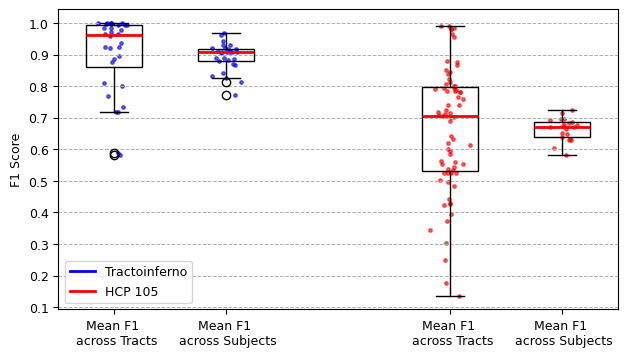

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D

def plot_comparison_f1_across_datasets(df1, df2, fontsize=9, figsize=(10, 6), markersize=6):
    # Calcular las medias de F1 para cada tracto y cada sujeto en ambos datasets
    f1_across_tracts_df1 = df1.groupby('tract')['F1'].mean()
    f1_across_subjects_df1 = df1.groupby('subject_id')['F1'].mean()

    f1_across_tracts_df2 = df2.groupby('tract')['F1'].mean()
    f1_across_subjects_df2 = df2.groupby('subject_id')['F1'].mean()

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=figsize)

    # Crear el boxplot para las cuatro categorías
    data = [f1_across_tracts_df1, f1_across_subjects_df1, f1_across_tracts_df2, f1_across_subjects_df2]
    positions = [1, 2, 4, 5]

    box = ax.boxplot(data, positions=positions, patch_artist=True, 
                     boxprops=dict(facecolor="none", color="black"), 
                     whiskerprops=dict(color="black"),
                     capprops=dict(color="black"),
                     medianprops=dict(color="red", linewidth=2))

    # Añadir puntos individuales sobre las categorías
    colors = ['blue', 'red']  # Colores para los dos datasets
    for i, pos in enumerate(positions):
        if i < 2:
            ax.scatter(np.random.normal(pos, 0.06, size=len(data[i])), data[i],
                       color=colors[0], alpha=0.6, s=markersize)
        else:
            ax.scatter(np.random.normal(pos, 0.06, size=len(data[i])), data[i],
                       color=colors[1], alpha=0.6, s=markersize)

    # Etiquetas y diseño
    ax.set_xticks(positions)
    ax.set_xticklabels(['Mean F1 \n across Tracts', 'Mean F1 \n across Subjects', 
                        'Mean F1 \n across Tracts', 'Mean F1 \n across Subjects'], fontsize=fontsize)
    ax.set_ylabel('F1 Score', fontsize=fontsize)
    # ax.set_title('Comparison of Mean F1 Scores across Tracts and Subjects for Two Datasets', fontsize=fontsize)

    # Crear objetos Line2D para la leyenda
    legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Tractoinferno'),
                       Line2D([0], [0], color='red', lw=2, label='HCP 105')]

    # Añadir una leyenda
    ax.legend(handles=legend_elements, loc='lower left', fontsize=fontsize)

    # Ajustar las líneas verticales (ticks) en el eje Y a intervalos de 0.05
    ax.set_yticks(np.arange(0.1, 1.05, 0.1))
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    # Ajustar el tamaño de las etiquetas en el eje Y
    ax.tick_params(axis='y', labelsize=fontsize)

    # Ajustar los márgenes usando subplots_adjust
    plt.subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.15)

    # guardar la figura como pdf 
    plt.savefig('/app/imgs/comparison_f1_across_datasets.pdf', format='pdf', dpi=300)

    plt.show()

# Ejemplo de uso:
df1 = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')
df2 = pd.read_csv('/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv')
plot_comparison_f1_across_datasets(df1, df2, figsize=(7, 4), markersize=6)



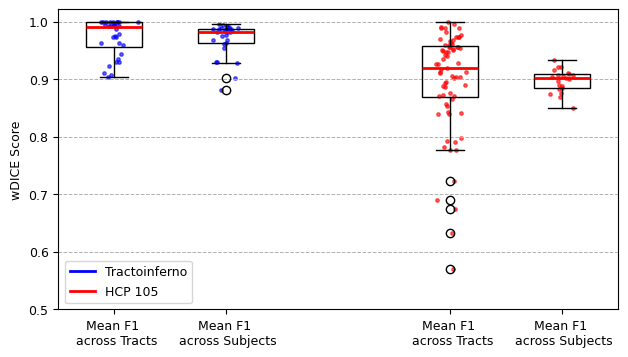

In [6]:
def plot_comparison_wDICE_across_datasets(df1, df2, fontsize=9, figsize=(10, 6), markersize=6):
    # Calcular las medias de F1 para cada tracto y cada sujeto en ambos datasets
    f1_across_tracts_df1 = df1.groupby('tract')['wDICE'].mean()
    f1_across_subjects_df1 = df1.groupby('subject_id')['wDICE'].mean()

    f1_across_tracts_df2 = df2.groupby('tract')['wDICE'].mean()
    f1_across_subjects_df2 = df2.groupby('subject_id')['wDICE'].mean()

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=figsize)

    # Crear el boxplot para las cuatro categorías
    data = [f1_across_tracts_df1, f1_across_subjects_df1, f1_across_tracts_df2, f1_across_subjects_df2]
    positions = [1, 2, 4, 5]

    box = ax.boxplot(data, positions=positions, patch_artist=True, 
                     boxprops=dict(facecolor="none", color="black"), 
                     whiskerprops=dict(color="black"),
                     capprops=dict(color="black"),
                     medianprops=dict(color="red", linewidth=2))

    # Añadir puntos individuales sobre las categorías
    colors = ['blue', 'red']  # Colores para los dos datasets
    for i, pos in enumerate(positions):
        if i < 2:
            ax.scatter(np.random.normal(pos, 0.06, size=len(data[i])), data[i],
                       color=colors[0], alpha=0.6, s=markersize)
        else:
            ax.scatter(np.random.normal(pos, 0.06, size=len(data[i])), data[i],
                       color=colors[1], alpha=0.6, s=markersize)

    # Etiquetas y diseño
    ax.set_xticks(positions)
    ax.set_xticklabels(['Mean F1 \n across Tracts', 'Mean F1 \n across Subjects', 
                        'Mean F1 \n across Tracts', 'Mean F1 \n across Subjects'], fontsize=fontsize)
    ax.set_ylabel('wDICE Score', fontsize=fontsize)
    # ax.set_title('Comparison of Mean F1 Scores across Tracts and Subjects for Two Datasets', fontsize=fontsize)

    # Crear objetos Line2D para la leyenda
    legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Tractoinferno'),
                       Line2D([0], [0], color='red', lw=2, label='HCP 105')]

    # Añadir una leyenda
    ax.legend(handles=legend_elements, loc='lower left', fontsize=fontsize)

    # Ajustar las líneas verticales (ticks) en el eje Y a intervalos de 0.05
    ax.set_yticks(np.arange(0.5, 1.05, 0.1))
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)

    # Ajustar el tamaño de las etiquetas en el eje Y
    ax.tick_params(axis='y', labelsize=fontsize)

    # Ajustar los márgenes usando subplots_adjust
    plt.subplots_adjust(left=0.15, right=0.95, top=0.90, bottom=0.15)

    # guardar la figura como pdf
    plt.savefig('/app/imgs/comparison_wDICE_across_datasets.pdf', format='pdf', dpi=300)

    plt.show()

# Ejemplo de uso:
df1 = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')
df2 = pd.read_csv('/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv')
plot_comparison_wDICE_across_datasets(df1, df2, figsize=(7, 4), markersize=6)

# TractoInferno Baseline Classifier Result Analisys

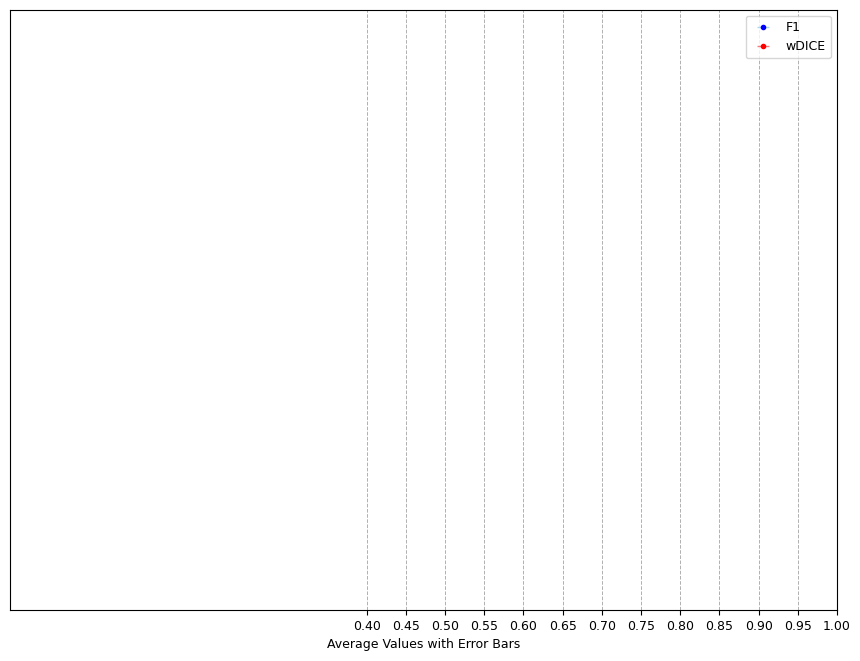

In [8]:
df = pd.read_csv('/app/resultados/results_tractoinferno_baseline_classifier.csv')

plot_f1_wdice_with_error_bars_by_tract(df, fontsize=9, figsize=(8.27, 6), low_limit=0.4, high_limit=1.05, save_path='/app/imgs/results_tractoinferno_baseline_classifier_by_tract.pdf')



# Comparativa resultados baseline vs pretrained 

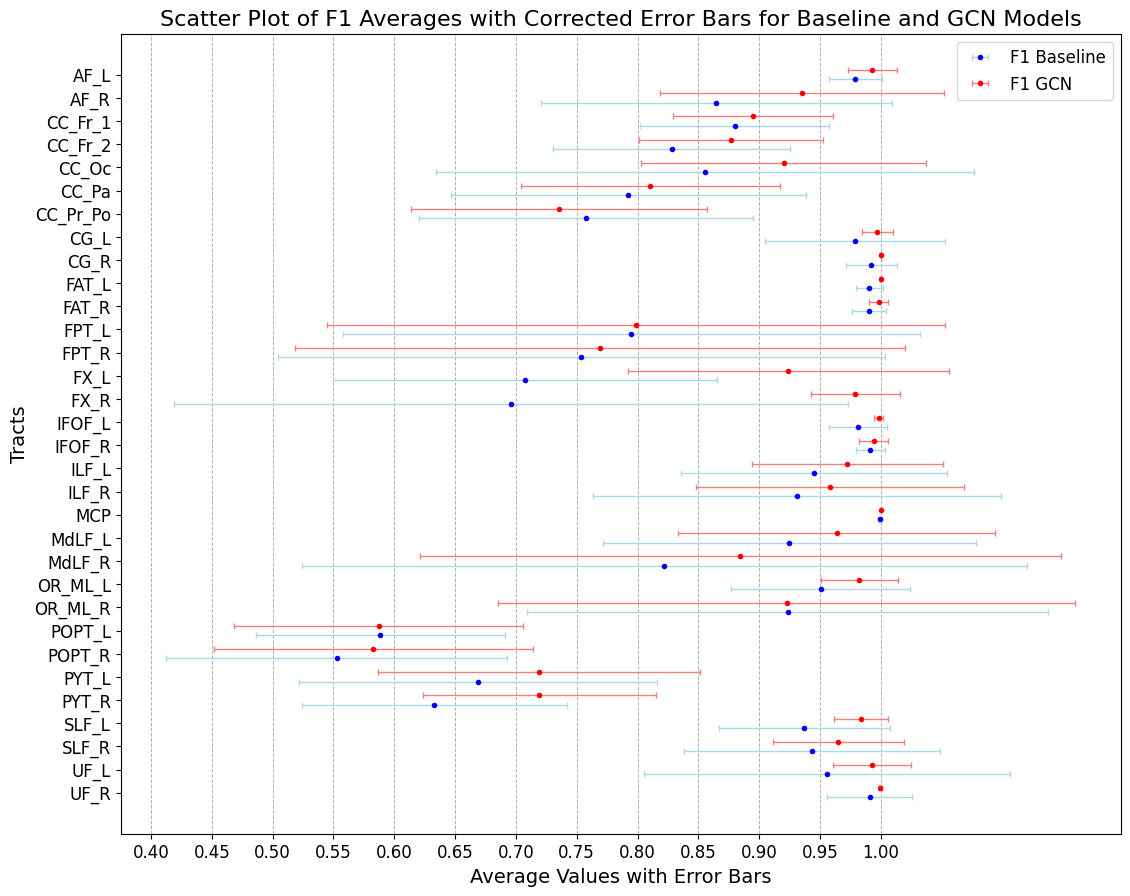

In [12]:
# Comparar los resultados de diferentes metricas en mismo dataset utilizando diferentes modelos
df_baseline = pd.read_csv('/app/resultados/results_tractoinferno_baseline_classifier.csv')
df_gcn = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')



# Calcular los promedios y desviaciones estándar de F1 y wDICE por tracto
tract_means_baseline = df_baseline.groupby('tract').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
tract_means_baseline.columns = ['tract', 'F1_mean_baseline', 'F1_std_baseline', 'wDICE_mean_baseline', 'wDICE_std_baseline']

tract_means_gcn = df_gcn.groupby('tract').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
tract_means_gcn.columns = ['tract', 'F1_mean_gcn', 'F1_std_gcn', 'wDICE_mean_gcn', 'wDICE_std_gcn']

# Combinar los resultados en un solo DataFrame
tract_means_combined = pd.merge(tract_means_baseline, tract_means_gcn, on='tract')

# Crear el scatter plot con las barras de error corregidas
fig, ax = plt.subplots(figsize=(10, 8))

# Posicionar los puntos para que no se superpongan
y_positions = list(range(len(tract_means_combined['tract'])))
y_positions.reverse()  # Invertir el orden de las posiciones en el eje Y
offset = 0.2  # Desplazamiento entre los puntos
y_positions_f1_baseline = [y - offset for y in y_positions]
y_positions_f1_gcn = [y + offset for y in y_positions]

# Scatter plot con barras de error colocadas al lado
ax.errorbar(tract_means_combined['F1_mean_baseline'], y_positions_f1_baseline, xerr=tract_means_combined['F1_std_baseline'], fmt='o', label='F1 Baseline', color='blue', ecolor='lightblue', elinewidth=1, capsize=2, markersize=3)
ax.errorbar(tract_means_combined['F1_mean_gcn'], y_positions_f1_gcn, xerr=tract_means_combined['F1_std_gcn'], fmt='o', label='F1 GCN', color='red', ecolor='lightcoral', elinewidth=1, capsize=2, markersize=3)

# Etiquetas y diseño
ax.set_yticks(y_positions)
ax.set_yticklabels(tract_means_combined['tract'], fontsize=12)
ax.set_xlabel('Average Values with Error Bars', fontsize=14)
ax.set_ylabel('Tracts', fontsize=14)
ax.set_title('Scatter Plot of F1 Averages with Corrected Error Bars for Baseline and GCN Models', fontsize=16)
ax.legend(fontsize=12)

# Ajustar las líneas verticales (ticks) en el eje X a intervalos de 0.05
ax.set_xticks(np.arange(0.4, 1.05, 0.05))
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

# Reducir el tamaño de los números del eje X
ax.tick_params(axis='x', labelsize=12)

# Ajustar los márgenes usando subplots_adjust
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Guardar la figura en un archivo
plt.savefig('/app/imgs/comparison_f1_baseline_gcn_by_tract.pdf', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()


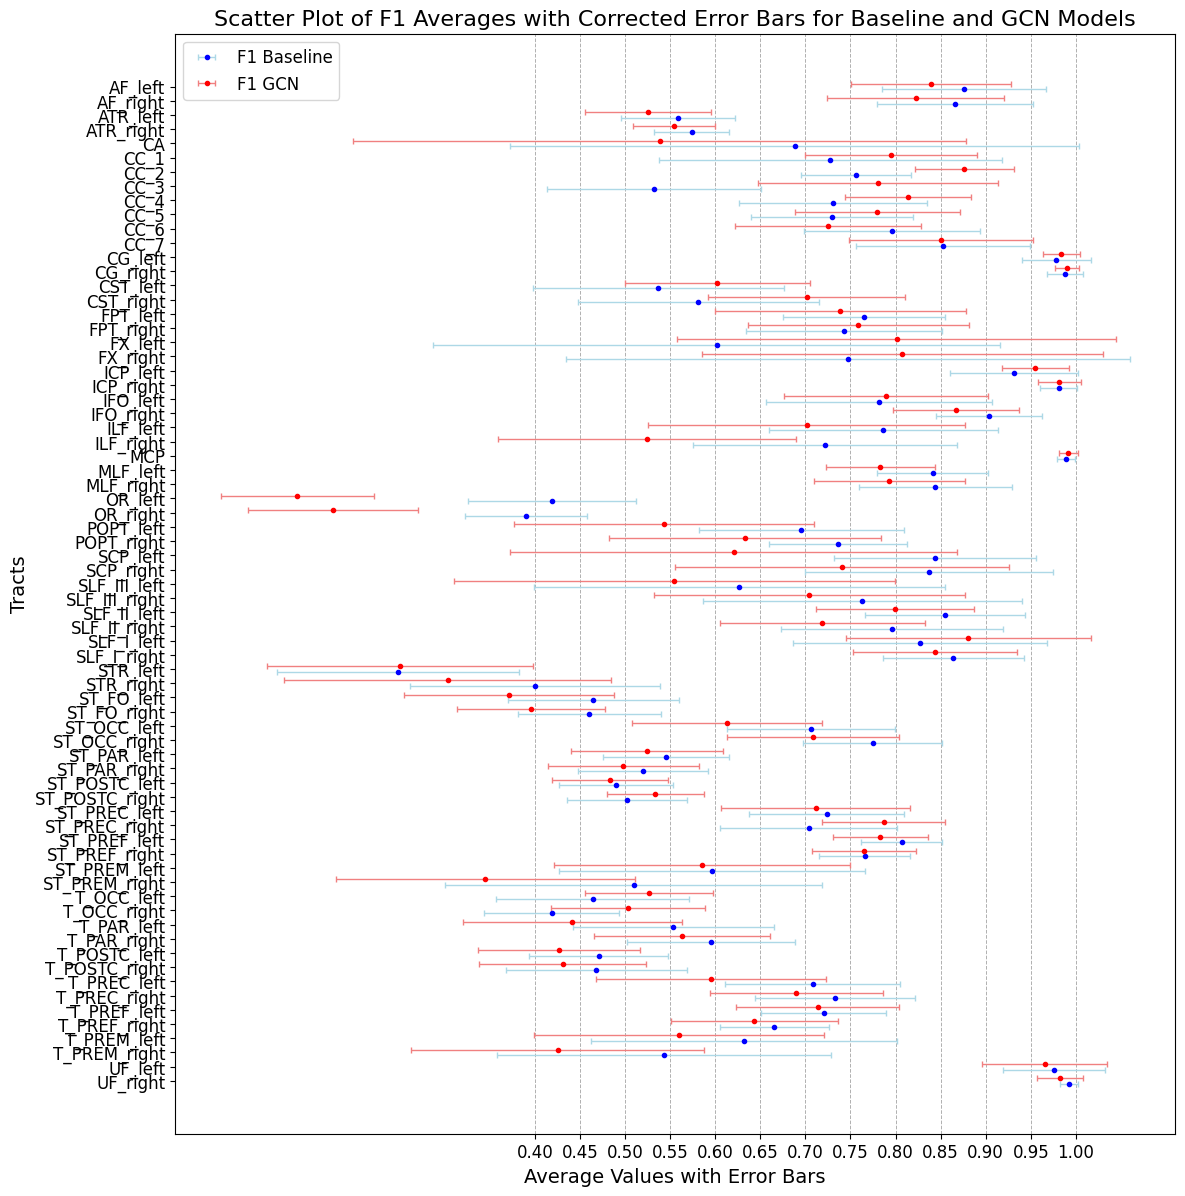

In [14]:
# Comparar los resultados de diferentes metricas en mismo dataset utilizando diferentes modelos
# df_baseline = pd.read_csv('/app/resultados/results_tractoinferno_baseline_classifier.csv')
# df_gcn = pd.read_csv('/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv')

df_baseline = pd.read_csv('/app/resultados/results_hcp_105_without_cc_baseline_classifier.csv')
df_gcn = pd.read_csv('/app/resultados/results_checkpoint_HCP_105_without_CC_finetuned_GCN_0_3.61.csv')


# Calcular los promedios y desviaciones estándar de F1 y wDICE por tracto
tract_means_baseline = df_baseline.groupby('tract').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
tract_means_baseline.columns = ['tract', 'F1_mean_baseline', 'F1_std_baseline', 'wDICE_mean_baseline', 'wDICE_std_baseline']

tract_means_gcn = df_gcn.groupby('tract').agg({'F1': ['mean', 'std'], 'wDICE': ['mean', 'std']}).reset_index()
tract_means_gcn.columns = ['tract', 'F1_mean_gcn', 'F1_std_gcn', 'wDICE_mean_gcn', 'wDICE_std_gcn']

# Combinar los resultados en un solo DataFrame
tract_means_combined = pd.merge(tract_means_baseline, tract_means_gcn, on='tract')

# Crear el scatter plot con las barras de error corregidas
fig, ax = plt.subplots(figsize=(10, 11))

# Posicionar los puntos para que no se superpongan
y_positions = list(range(len(tract_means_combined['tract'])))
y_positions.reverse()  # Invertir el orden de las posiciones en el eje Y
offset = 0.2  # Desplazamiento entre los puntos
y_positions_f1_baseline = [y - offset for y in y_positions]
y_positions_f1_gcn = [y + offset for y in y_positions]

# Scatter plot con barras de error colocadas al lado
ax.errorbar(tract_means_combined['F1_mean_baseline'], y_positions_f1_baseline, xerr=tract_means_combined['F1_std_baseline'], fmt='o', label='F1 Baseline', color='blue', ecolor='lightblue', elinewidth=1, capsize=2, markersize=3)
ax.errorbar(tract_means_combined['F1_mean_gcn'], y_positions_f1_gcn, xerr=tract_means_combined['F1_std_gcn'], fmt='o', label='F1 GCN', color='red', ecolor='lightcoral', elinewidth=1, capsize=2, markersize=3)

# Etiquetas y diseño
ax.set_yticks(y_positions)
ax.set_yticklabels(tract_means_combined['tract'], fontsize=12)
ax.set_xlabel('Average Values with Error Bars', fontsize=14)
ax.set_ylabel('Tracts', fontsize=14)
ax.set_title('Scatter Plot of F1 Averages with Corrected Error Bars for Baseline and GCN Models', fontsize=16)
ax.legend(fontsize=12)

# Ajustar las líneas verticales (ticks) en el eje X a intervalos de 0.05
ax.set_xticks(np.arange(0.4, 1.05, 0.05))
ax.grid(True, which='both', axis='x', linestyle='--', linewidth=0.7)

# Reducir el tamaño de los números del eje X
ax.tick_params(axis='x', labelsize=12)

# Ajustar los márgenes usando subplots_adjust
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Guardar la figura en un archivo
plt.savefig('/app/imgs/comparison_f1_baseline_gcn_by_tract.pdf', dpi=300, bbox_inches='tight')

# Mostrar el gráfico
plt.show()

BAsura

In [4]:
# Calcular y mostrar todos los valores promedio de wDICE a nivel de tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
print(tract_DICE_avg)


tract
AF_left         0.660158
AF_right        0.624402
ATR_left        0.559216
ATR_right       0.667221
CA              0.535520
                  ...   
T_PREF_right    0.769508
T_PREM_left     0.786051
T_PREM_right    0.970869
UF_left         0.811542
UF_right        0.635274
Name: DICE, Length: 71, dtype: float64


In [5]:
# Calcular y mostrar los valores promedio de wDICE a nivel de tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
tract_wDICE_avg

tract
AF_left         0.912959
AF_right        0.873247
ATR_left        0.723826
ATR_right       0.889432
CA              0.790240
                  ...   
T_PREF_right    0.959112
T_PREM_left     0.893244
T_PREM_right    0.988577
UF_left         0.967062
UF_right        0.798129
Name: wDICE, Length: 71, dtype: float64

In [6]:
# Cargar archivo csv /app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2.csv
#file_path = '/app/resultados/results_HCP_105_without_CC_GCNEncoder_v2_v2_classif.csv'  # Ajusta la ruta según sea necesario
# file_path = '/app/resultados/results_checkpoint_Tractoinferno_GCN_512_0.csv'  # Ajusta la ruta según sea necesario
# df = pd.read_csv(file_path)

df


,subject_id,tract,n_streamlines,accuracy,precision,recall,F1,AUCROC,DICE,wDICE
0,sub-1049,AF_L,29095,0.999990,1.000000,0.999622,0.999811,1.000000,0.998708,0.999940
1,sub-1049,AF_R,5295,0.999731,1.000000,0.944476,0.971445,0.999914,0.931925,0.986787
2,sub-1049,CC_Fr_1,209146,0.977088,0.944063,0.935662,0.939844,0.998126,0.965702,0.993030
3,sub-1049,CC_Fr_2,186694,0.920189,0.732358,0.839336,0.782206,0.978416,0.848641,0.975358
4,sub-1049,CC_Oc,94827,0.998955,1.000000,0.987946,0.993937,1.000000,0.988948,0.999711
...,...,...,...,...,...,...,...,...,...,...
698,sub-1281,PYT_R,43389,0.971984,0.682231,0.571112,0.621746,0.988462,0.799075,0.947859
699,sub-1281,SLF_L,16031,0.999977,1.000000,0.998441,0.999220,1.000000,0.997789,0.999840
700,sub-1281,SLF_R,22638,0.997740,0.996706,0.895530,0.943413,0.999782,0.924329,0.989227
701,sub-1281,UF_L,24547,0.999682,0.986259,1.000000,0.993082,1.000000,0.985075,0.996552


## Weighted DICE metrics per tract

/tmp/ipykernel_431245/4043387579.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




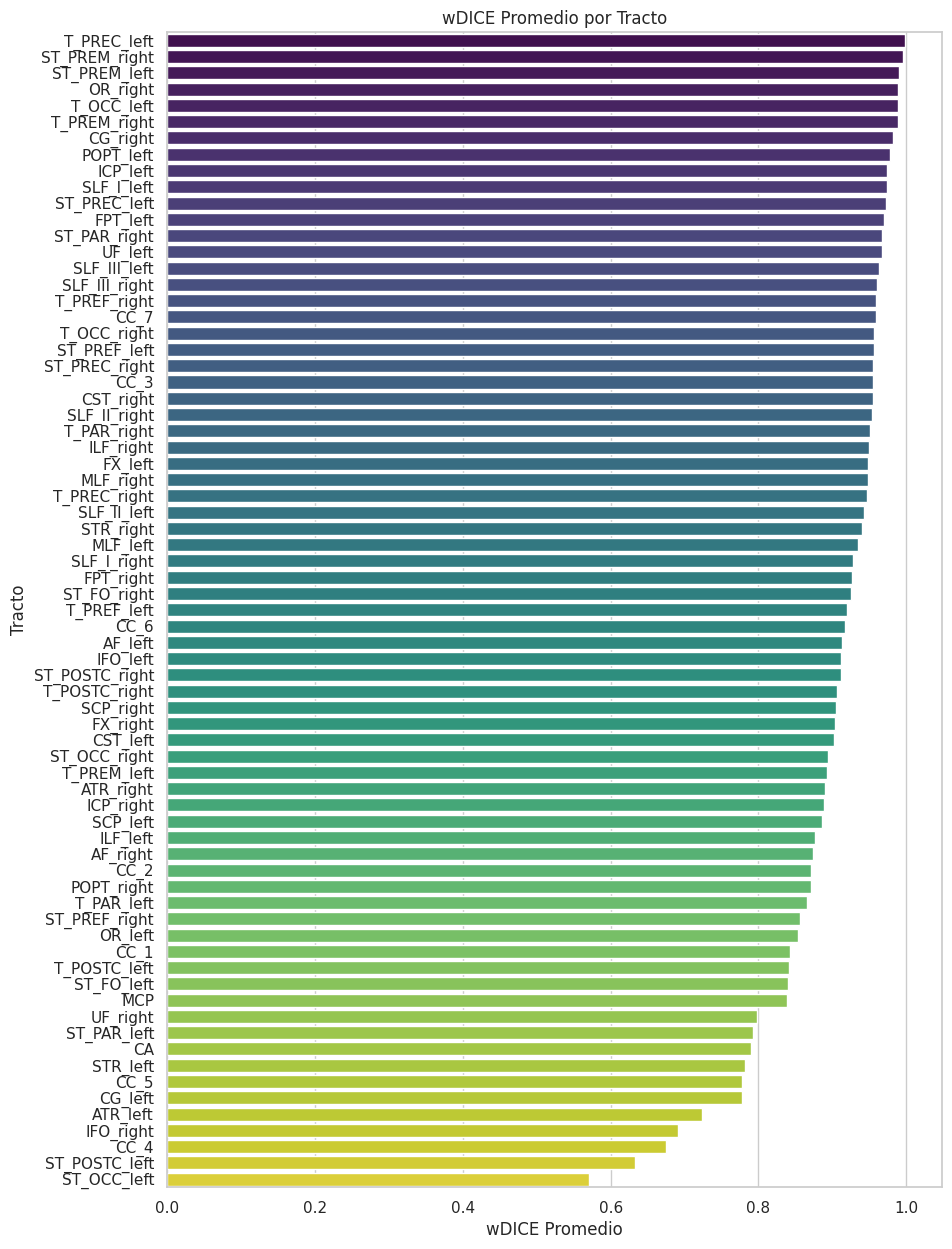

In [14]:
# Calcular la media de wDICE para cada tracto
tract_wDICE_avg = df.groupby('tract')['wDICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_wDICE_avg = tract_wDICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(10, 15))
sns.barplot(x=tract_wDICE_avg.values, y=tract_wDICE_avg.index, palette='viridis')
plt.xlabel('wDICE Promedio')
plt.ylabel('Tracto')
plt.title('wDICE Promedio por Tracto')
plt.show()

## DICE metrics per tract

/tmp/ipykernel_456976/667507015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tract_DICE_avg.values, y=tract_DICE_avg.index, palette='viridis')


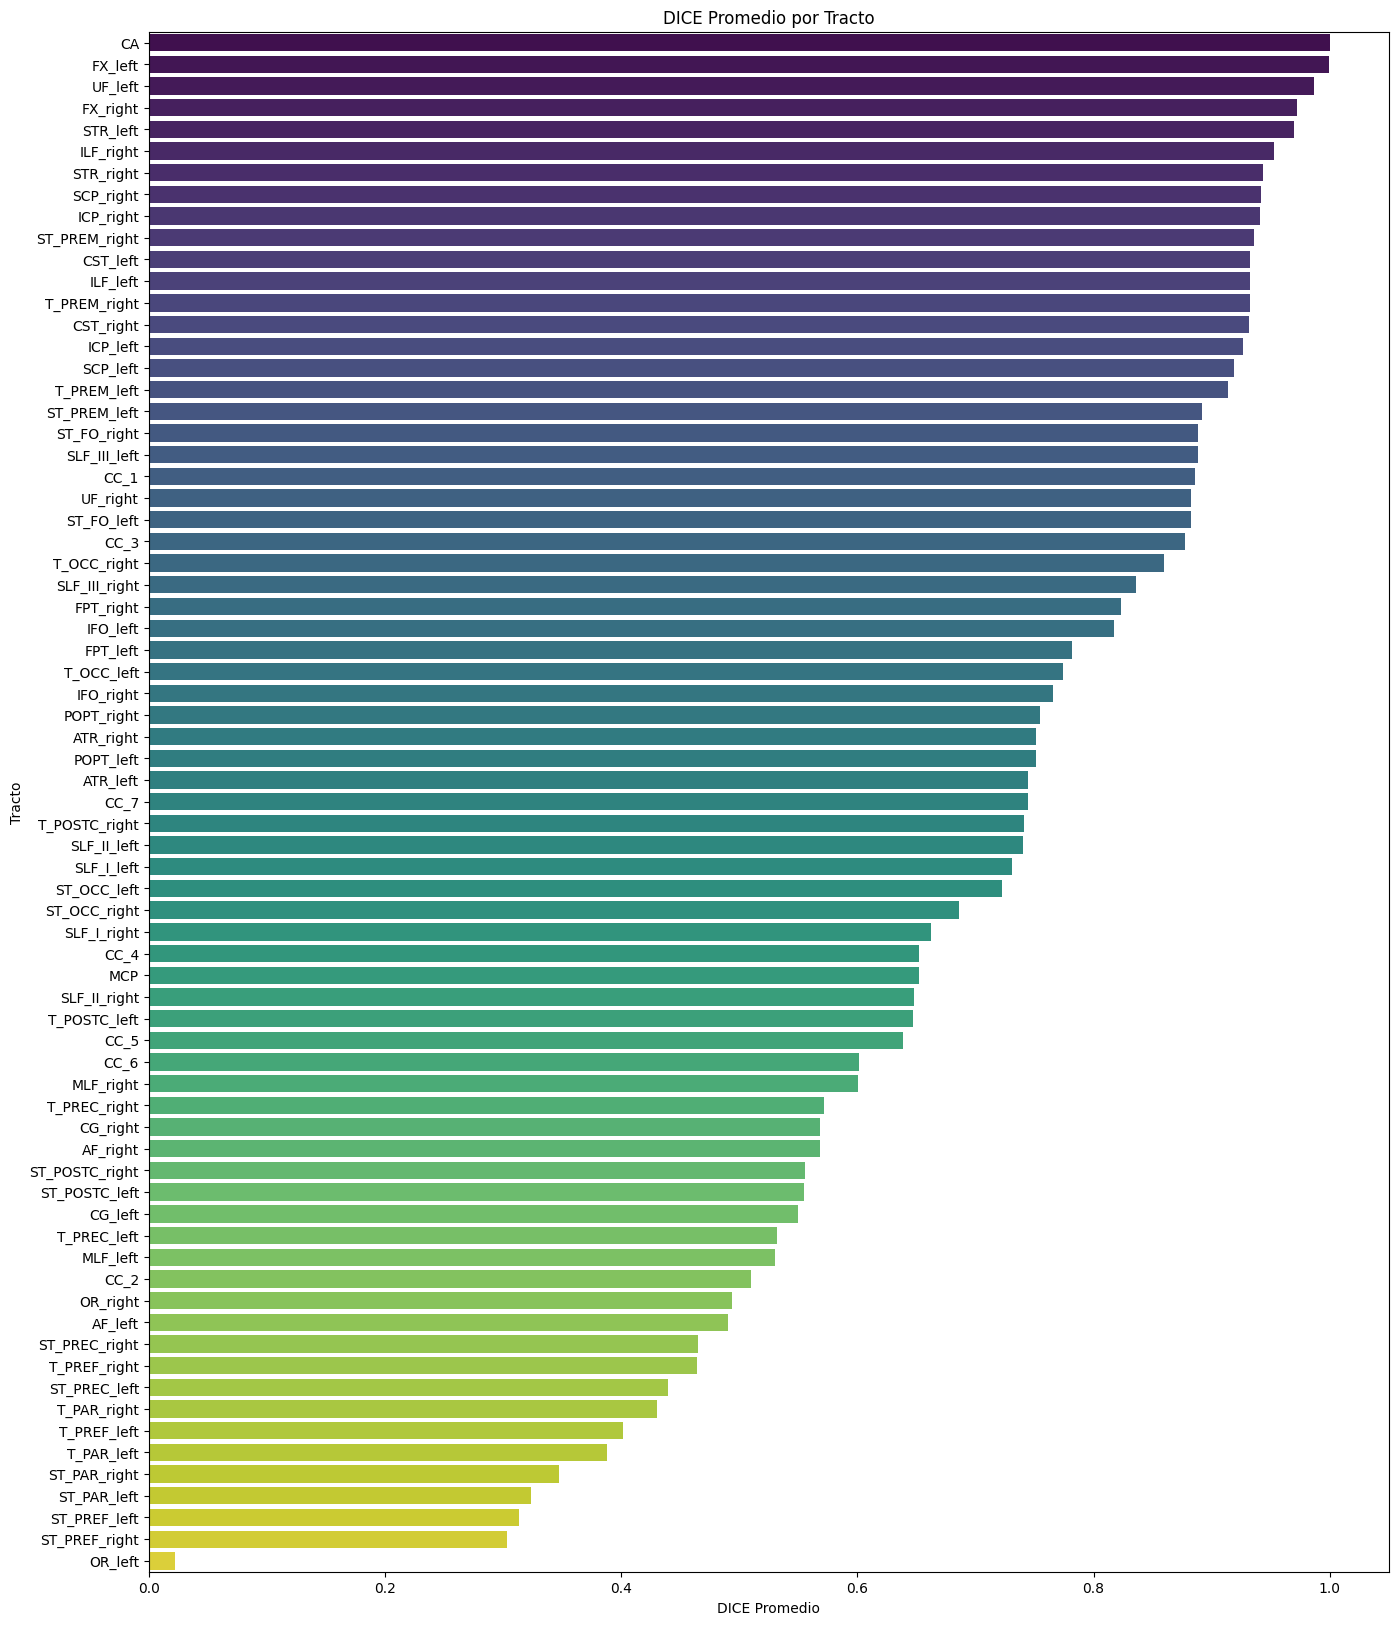

In [4]:
# Calcular la media de wDICE para cada tracto
tract_DICE_avg = df.groupby('tract')['DICE'].mean()
# Ordenar los valores promedio de wDICE de mayor a menor
tract_DICE_avg = tract_DICE_avg.sort_values(ascending=False)

# Crear un gráfico de barras horizontales para mostrar los valores promedio de wDICE por tracto
plt.figure(figsize=(16, 20))
sns.barplot(x=tract_DICE_avg.values, y=tract_DICE_avg.index, palette='viridis')
plt.xlabel('DICE Promedio')
plt.ylabel('Tracto')
plt.title('DICE Promedio por Tracto')
plt.show()
